## For calculation of the number of the predicted labels

- from original filtered xlsx file make a labels-count.xlsx 
    - we wanna use this in the `plot_distribution.ipynb`

In [11]:
import pandas as pd
from collections import Counter
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import os

# Replace 'your_excel_file.xlsx' with the path to your actual Excel file
file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-16.xlsx'

# Read the Excel file using the openpyxl engine
df = pd.read_excel(file_path, engine='openpyxl')

# Group by 'true_label' and create a list of 'predicted_label' for each group
grouped_labels = df.groupby('true_label')['predicted_label'].apply(list)

# Count the occurrences of each 'predicted_label' within the lists
label_counts = grouped_labels.apply(lambda labels: Counter(labels))

# Convert the count objects to the string representation format
formatted_counts = label_counts.apply(lambda count_dict: ', '.join([f"{label}:{count}" for label, count in count_dict.items()]))

# Reset the index to turn this into a DataFrame
formatted_counts_df = formatted_counts.reset_index(name='formatted_predicted_label_counts')

# Create a new workbook and select the active worksheet
wb = Workbook()
ws = wb.active

# Add the DataFrame to the Excel file
for r in dataframe_to_rows(formatted_counts_df, index=False, header=True):
    ws.append(r)

# Define the output file name, changing the extension to .xlsx
output_file_path_xlsx = f"labels-count-{os.path.splitext(os.path.basename(file_path))[0]}.xlsx"

# Save the workbook
wb.save(output_file_path_xlsx)

# Print the output path
print(f"The Excel file has been saved to: {output_file_path_xlsx}")


The Excel file has been saved to: labels-count-filtered_mapped_true_predicted_labels-transR_50-graphSAGE-16.xlsx


- from original filtered xlsx file make a labels count.csv  
    - format: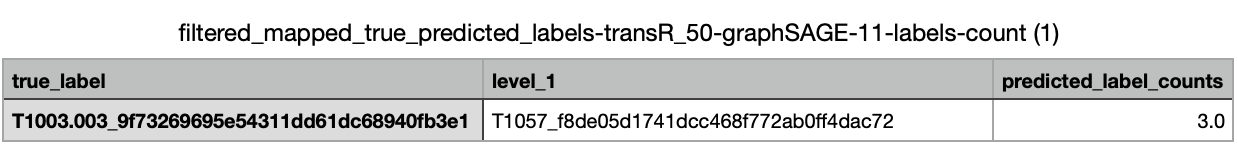


In [9]:
import pandas as pd
from collections import Counter
import os
from tqdm.notebook import tqdm 

# 替換這裡的字符串為你的Excel文件路徑
file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-16.xlsx'

# 用os.path.splitext分離檔案名和擴展名，然後構建新的輸出文件名
file_name_without_extension = os.path.splitext(file_path)[0]
output_file_path = f'{file_name_without_extension}-labels-count.csv'

# 讀取Excel文件，這裡指定使用openpyxl引擎
df = pd.read_excel(file_path, engine='openpyxl')

# 使用Counter來計算每個true_label對應的predicted_label的數量
def count_predicted_labels(group):
    return dict(Counter(group))

# 對true_label分組，然後應用上面定義的函數
label_counts = df.groupby('true_label')['predicted_label'].apply(count_predicted_labels).reset_index(name='predicted_label_counts')

# 將結果保存到CSV文件
label_counts.to_csv(output_file_path, index=False)

# 打印出保存路徑
print(f"Label counts saved to {output_file_path}")


Label counts saved to ./filtered_mapped_true_predicted_labels-transR_50-graphSAGE-16-labels-count.csv


- from the original xlsx file turn to the format like:
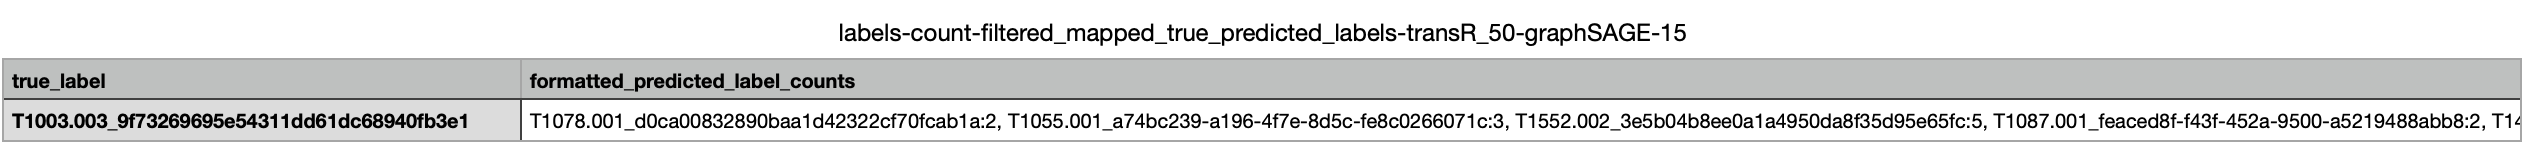

In [10]:
import pandas as pd
from collections import Counter
import os

# Replace 'your_excel_file.xlsx' with the path to your actual Excel file
file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-16.xlsx'

# Assuming file_path is a path to your Excel file
# Ensure the 'engine' parameter is set to 'openpyxl' or 'xlrd' depending on your file format and library installation
df = pd.read_excel(file_path, engine='openpyxl')

# Group by 'true_label' and create a list of 'predicted_label' for each group
grouped_labels = df.groupby('true_label')['predicted_label'].apply(list)

# Count the occurrences of each 'predicted_label' within the lists
label_counts = grouped_labels.apply(lambda labels: Counter(labels))

# Convert the count objects to the string representation format
formatted_counts = label_counts.apply(lambda count_dict: ', '.join([f"{label}:{count}" for label, count in count_dict.items()]))

# Reset the index to turn this into a DataFrame
formatted_counts_df = formatted_counts.reset_index(name='formatted_predicted_label_counts')

# Create the output file name
output_file_path = f"labels-count-{os.path.splitext(os.path.basename(file_path))[0]}.csv"

# Save to CSV
formatted_counts_df.to_csv(output_file_path, index=False)

print(file_path)

# Output the DataFrame
formatted_counts_df

./filtered_mapped_true_predicted_labels-transR_50-graphSAGE-16.xlsx


,true_label,formatted_predicted_label_counts
0,T1003.003_9f73269695e54311dd61dc68940fb3e1,"T1053.005_ee454be9197890de62705ce6255933fd:4, ..."
1,T1003.003_f049b89533298c2d6cd37a940248b219,"T1490_c156ac5c9fa67080365268d95f29053d:3, T101..."
2,T1007_c6607391-d02c-44b5-9b13-d3492ca58599,"T1016_71b3d2945679566b9d94d8cb11df4b70:3, T105..."
3,T1016_14a21534-350f-4d83-9dd7-3c56b93a0c17,T1497.001_7a6ba833-de40-466a-8969-5c37b13603e0...
4,T1016_71b3d2945679566b9d94d8cb11df4b70,"T1047_09e0f9cf2eb803a1c35deeecf3665fad:2, T100..."
5,T1016_921055f4-5970-4707-909e-62f594234d91,"T1499_2fe2d5e6-7b06-4fc0-bf71-6966a1226731:3, ..."
6,T1016_a0676fe1-cd52-482e-8dde-349b73f9aa69,"T1082_29451844-9b76-4e16-a9ee-d6feab4b24db:3, ..."
7,T1016_e8017c46-acb8-400c-a4b5-b3362b5b5baa,"T1047_09e0f9cf2eb803a1c35deeecf3665fad:2, T104..."
8,T1018_26c8b8b5-7b5b-4de1-a128-7d37fb14f517,"T1047_f4b0b4129560ea66f9751275e82f6bab:2, T105..."
9,T1018_a44bb43474728496276d5d73aa14588f,"T1047_09e0f9cf2eb803a1c35deeecf3665fad:3, T101..."


In [1]:
import pandas as pd
from collections import Counter

file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-13.xlsx'
df = pd.read_csv(file_path)

def count_predicted_labels(group):
    return Counter(group)

label_counts = df.groupby('true_label')['predicted_label'].apply(count_predicted_labels).reset_index(name='predicted_label_counts')

output_file_path = 'predicted_label_counts.csv'
label_counts.to_csv(output_file_path, index=False)

print(f"Label counts saved to {output_file_path}")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2


In [2]:
import pandas as pd
from collections import Counter
import os
from tqdm.notebook import tqdm 

# 替換這裡的字符串為你的Excel文件路徑
file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-11.xlsx'

# 用os.path.splitext分離檔案名和擴展名，然後構建新的輸出文件名
file_name_without_extension = os.path.splitext(file_path)[0]
output_file_path = f'{file_name_without_extension}-labels-count.csv'
df = pd.read_excel(file_path)

# 使用Counter來計算每個true_label對應的predicted_label的數量
def count_predicted_labels(group):
    return dict(Counter(group))

# 對true_label分組，然後應用上面定義的函數
label_counts = df.groupby('true_label')['predicted_label'].apply(count_predicted_labels).reset_index(name='predicted_label_counts')

# 將結果保存到CSV文件
label_counts.to_csv(output_file_path, index=False)

# 打印出保存路徑
print(f"Label counts saved to {output_file_path}")


XLRDError: Excel xlsx file; not supported

Label counts saved to ./filtered_mapped_true_predicted_labels-transR_50-graphSAGE-13-labels-count.csv


In [4]:
import pandas as pd
from collections import Counter

# 您將需要將這裡的路徑替換為您的Excel文件的實際路徑
file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-11.xlsx'

# 使用openpyxl引擎讀取Excel文件
df = pd.read_excel(file_path, engine='openpyxl')

# 使用Counter來計算每個true_label對應的predicted_label的數量
def count_predicted_labels(group):
    return Counter(group)

# 對true_label分組，然後應用上面定義的函數
label_counts = df.groupby('true_label')['predicted_label'].apply(count_predicted_labels).reset_index(name='predicted_label_counts')

# 轉換Counter對象為字符串表示
label_counts['predicted_label_counts'] = label_counts['predicted_label_counts'].apply(lambda x: ', '.join([f'{k}:{v}' for k, v in x.items()]))

# 構建新的輸出文件名
file_name_without_extension = os.path.splitext(file_path)[0]
output_file_path = f'{file_name_without_extension}-labels-count.csv'

# 將結果保存到CSV文件
label_counts.to_csv(output_file_path, index=False)

# 打印出保存路徑
print(f"Label counts saved to {output_file_path}")


AttributeError: 'float' object has no attribute 'items'

In [4]:
import pandas as pd
from collections import Counter
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import os

# Replace 'your_excel_file.xlsx' with the path to your actual Excel file
file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-13.xlsx'

# Read the Excel file using the openpyxl engine
df = pd.read_excel(file_path, engine='openpyxl')

# Group by 'true_label' and create a list of 'predicted_label' for each group
grouped_labels = df.groupby('true_label')['predicted_label'].apply(list)

# Count the occurrences of each 'predicted_label' within the lists
label_counts = grouped_labels.apply(lambda labels: Counter(labels))

# Convert the count objects to the string representation format
formatted_counts = label_counts.apply(lambda count_dict: ', '.join([f"{label}:{count}" for label, count in count_dict.items()]))

# Reset the index to turn this into a DataFrame
formatted_counts_df = formatted_counts.reset_index(name='formatted_predicted_label_counts')

# Create a new workbook and select the active worksheet
wb = Workbook()
ws = wb.active

# Add the DataFrame to the Excel file
for r in dataframe_to_rows(formatted_counts_df, index=False, header=True):
    ws.append(r)

# Define the output file name, changing the extension to .xlsx
output_file_path_xlsx = f"labels-count-{os.path.splitext(os.path.basename(file_path))[0]}.xlsx"

# Save the workbook
wb.save(output_file_path_xlsx)

# Print the output path
print(f"The Excel file has been saved to: {output_file_path_xlsx}")


The Excel file has been saved to: labels-count-filtered_mapped_true_predicted_labels-transR_50-graphSAGE-13.xlsx


In [11]:
import pandas as pd
from collections import Counter
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

file_path = './filtered_mapped_true_predicted_labels-transR_50-graphSAGE-11.xlsx'

# Assuming file_path is a path to your Excel file
# Read the Excel file using the openpyxl engine
df = pd.read_excel(file_path, engine='openpyxl')

# Group by 'true_label' and create a list of 'predicted_label' for each group
grouped_labels = df.groupby('true_label')['predicted_label'].apply(list)

# Count the occurrences of each 'predicted_label' within the lists
label_counts = grouped_labels.apply(lambda labels: Counter(labels))

# Convert the count objects to the string representation format
formatted_counts = label_counts.apply(lambda count_dict: ', '.join([f"{label}:{count}" for label, count in count_dict.items()]))

# Reset the index to turn this into a DataFrame
formatted_counts_df = formatted_counts.reset_index(name='formatted_predicted_label_counts')

# Add a new column to the DataFrame that contains the count of true positive matches
# The count is determined by the number of times the 'true_label' appears in the 'predicted_label' counts
formatted_counts_df['true_positive_count'] = formatted_counts_df.apply(
    lambda row: label_counts[row['true_label']][row['true_label']], axis=1)

# Create a new workbook and select the active worksheet
wb = Workbook()
ws = wb.active

# Add the DataFrame to the Excel file
for r in dataframe_to_rows(formatted_counts_df, index=False, header=True):
    ws.append(r)

# Define the output file name, changing the extension to .xlsx
output_file_path_xlsx = f"labels-count-{os.path.splitext(os.path.basename(file_path))[0]}.xlsx"

# Save the workbook
wb.save(output_file_path_xlsx)

# Print the path to the saved Excel file
print(f"The Excel file has been saved to: {output_file_path_xlsx}")


The Excel file has been saved to: labels-count-filtered_mapped_true_predicted_labels-transR_50-graphSAGE-11.xlsx
